In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [9]:
#data = pd.read_csv('/content/WISDM_ar_v1.1_raw.txt')

In [14]:
file = open('/content/WISDM_ar_v1.1_raw.txt',mode='r')
lines = file.readlines()

processedlist= []

for i, line in enumerate(lines):
  try:
    line = line.split(',')
    last = line[5].split(';')[0]
    last = last.strip()
    if last == '':
      break;
    temp = [line[0], line[1], line[2], line[3], line[4], last]
    processedlist.append(temp)
  except:
    print('Error at line number:', i)


Error at line number: 281873
Error at line number: 281874
Error at line number: 281875


In [15]:
processedlist

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [16]:
columns = ['user', 'activity','time', 'x', 'y', 'z']

In [17]:
data = pd.DataFrame(data=processedlist, columns = columns)

In [18]:
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [19]:
data.shape

(343416, 6)

In [20]:
data.info() #x, y, z should be converted to numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [21]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [22]:
data['activity'].value_counts() #Imbalanced data, hence downsampling

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [23]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [25]:
#from the information, data is plotted every 20HZ
Fs=20

In [26]:
activities = data['activity'].value_counts().index

In [27]:
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

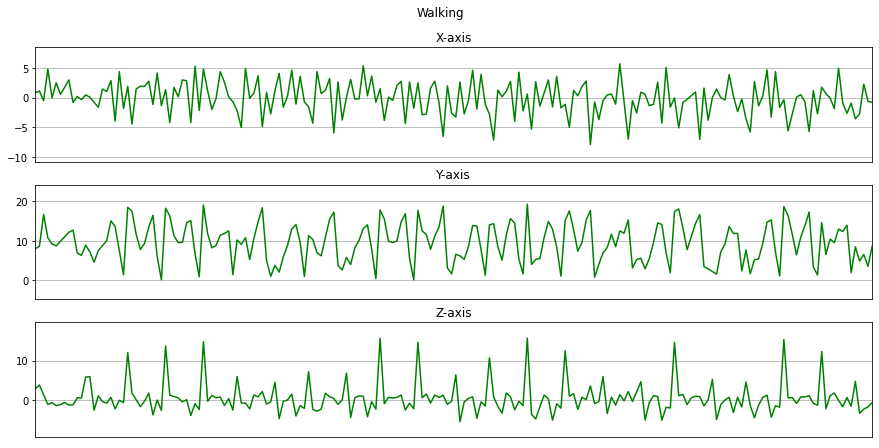

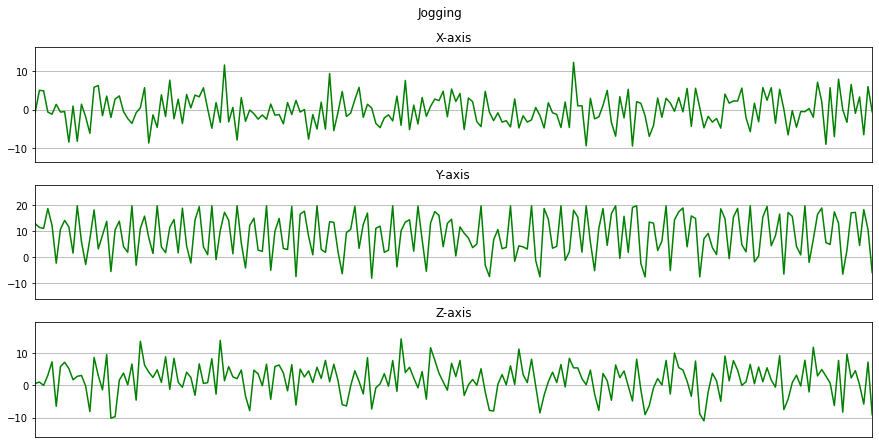

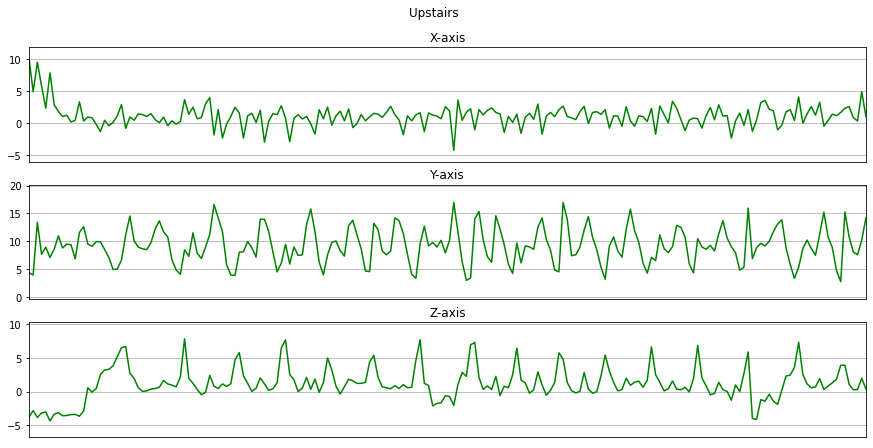

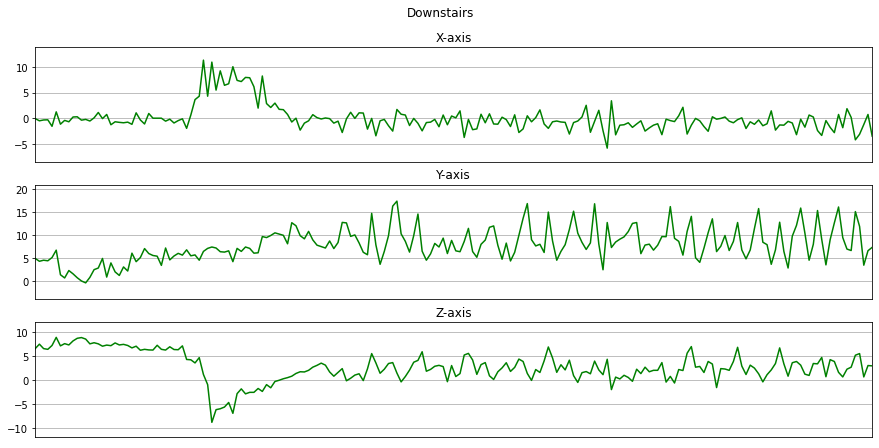

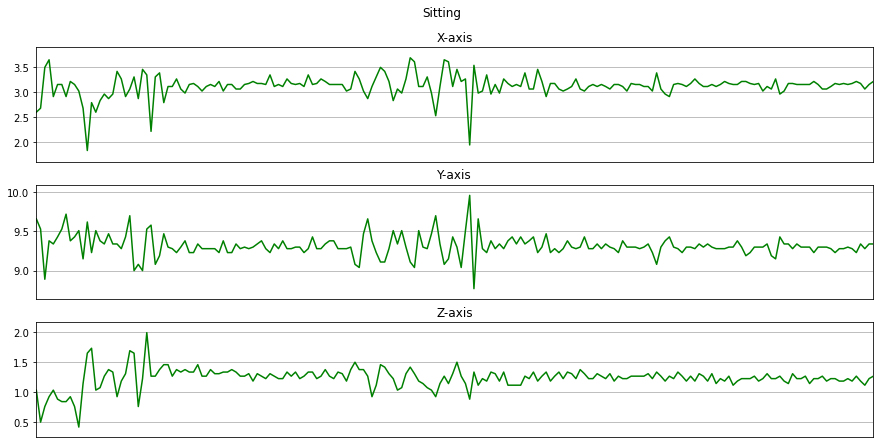

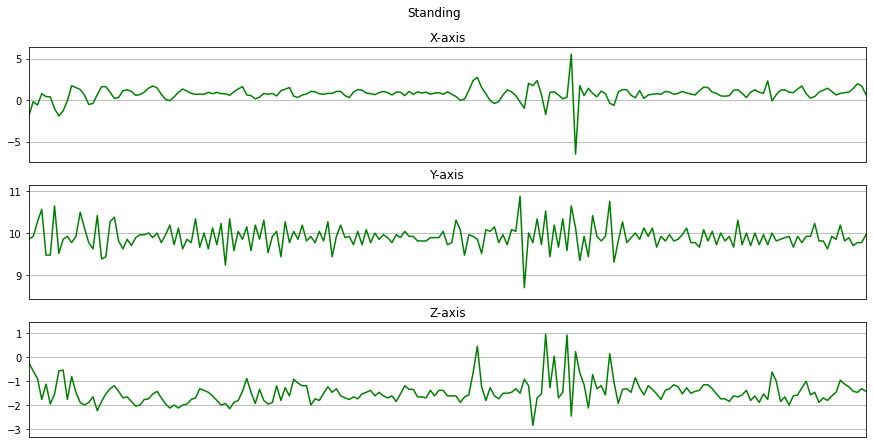

In [28]:
def plot_activity(activity,data):
  fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,figsize=(15,7), sharex=True)
  plot_axis(ax0,data['time'],data['x'], 'X-axis')
  plot_axis(ax1,data['time'],data['y'], 'Y-axis')
  plot_axis(ax2,data['time'],data['z'], 'Z-axis')
  plt.subplots_adjust(hspace=0.2)
  fig.suptitle(activity)
  plt.subplots_adjust(top=0.90)
  plt.show

def plot_axis(ax, x, y, title):
  ax.plot(x, y, 'g')
  ax.set_title(title)
  ax.xaxis.set_visible(False)
  ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
  ax.set_xlim([min(x), max(x)])
  ax.grid(True)

for activity in activities:
  data_for_plot = data[(data['activity'] == activity)][:Fs*10]
  plot_activity(activity,data_for_plot)

#Much activity on jogging and walking but others have less variance

In [29]:
df = data.drop(labels=['user', 'time'],axis=1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [30]:
walking_df = df[df['activity'] == 'Walking'].head(3555).copy()
jogging_df = df[df['activity'] == 'Jogging'].head(3555).copy()
upstairs_df = df[df['activity'] == 'upstairs'].head(3555).copy()
downstairs_df = df[df['activity'] == 'Downstairs'].head(3555).copy()
sitting_df = df[df['activity'] == 'Sitting'].head(3555).copy()
standing_df = df[df['activity'] == 'Standing'].copy()

In [31]:
balanced_df = pd.DataFrame()
balanced_df = balanced_df.append([walking_df,jogging_df,upstairs_df,downstairs_df,sitting_df,standing_df])
balanced_df.shape

(17775, 4)

In [32]:
balanced_df['activity'].value_counts()

Standing      3555
Jogging       3555
Walking       3555
Sitting       3555
Downstairs    3555
Name: activity, dtype: int64

In [33]:
balanced_df.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [34]:
label = LabelEncoder()
balanced_df['label'] = label.fit_transform(balanced_df['activity'])
balanced_df.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,4
598,Walking,1.116869,8.621680,3.786457,4
599,Walking,-0.503953,16.657684,1.307553,4
600,Walking,4.794363,10.760075,-1.184970,4
601,Walking,-0.040861,9.234595,-0.694638,4


In [35]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Walking'],
      dtype=object)

In [36]:
scaler = StandardScaler()
X = balanced_df[['x', 'y', 'z']]
Y = balanced_df['label']
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data=X, columns=['x','y','z'])
scaled_X['label'] = Y.values

scaled_X.head()

,x,y,z,label
0,-0.031408,-0.079040,0.366974,4
1,0.037677,0.035166,0.653076,4
2,-0.373382,1.532532,-0.060218,4
3,0.970333,0.433618,-0.777430,4
4,-0.255936,0.149372,-0.636339,4


In [44]:
scaled_X.shape

(17775, 4)

In [37]:
#The assumption is that a person doing an activity will do it for more than few seconds, hence it is logical to combine the data for few seconds as they represent in real life situation to predict an activity. Here we are making a 4 seconds data to make a prediction

### Frame preparations

In [3]:
Fs = 20 #(Samples)
frame_size = Fs*4 #(We will be feeding 80 samples to NN)
hop_size = Fs*2 #(whether there should be any overlap between b/w first frame and 2nd frame)

In [4]:
def get_frames(df, frame_size, hop_size):
  N_FEATURES = 3
  frames = []
  labels = []
  for i in range (0, len(df) - frame_size, hop_size):
    x = df['x'].values[i: i + frame_size]
    y = df['x'].values[i: i + frame_size]
    z = df['x'].values[i: i + frame_size]

    #Retrieve the most often used label in this segment
    label = stats.mode(df['label'][i: i+frame_size])[0][0]
    frames.append([x,y,z])
    labels.append(label)

  # bring  the segments into a better shape
  frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
  labels = np.asarray(labels)

  return frames, labels


In [42]:
X, Y = get_frames(scaled_X, frame_size, hop_size)

In [45]:
X.shape, Y.shape

((443, 80, 3), (443,))

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [52]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((354, 80, 3), (354,), (89, 80, 3), (89,))

In [51]:
x_train[0].shape, x_test[0].shape

((80, 3), (80, 3))

In [53]:
x_train = x_train.reshape(354,80,3,1)
x_test = x_test.reshape(89,80,3,1)

In [59]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(2,2),activation='relu', input_shape=(80,3,1)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=32,kernel_size=(2,2),activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=6,activation='softmax'))

In [60]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [61]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 21ms/step - loss: 1.7910 - accuracy: 0.1780 - val_loss: 1.6486 - val_accuracy: 0.2697
Epoch 2/100
12/12 [==============================] - 0s 11ms/step - loss: 1.6616 - accuracy: 0.2147 - val_loss: 1.5630 - val_accuracy: 0.2472
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 1.6466 - accuracy: 0.2345 - val_loss: 1.4931 - val_accuracy: 0.2472
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 1.5690 - accuracy: 0.2429 - val_loss: 1.4538 - val_accuracy: 0.4382
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 1.5302 - accuracy: 0.3107 - val_loss: 1.4228 - val_accuracy: 0.3820
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 1.4998 - accuracy: 0.3079 - val_loss: 1.3852 - val_accuracy: 0.3820
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 1.4372 - accuracy: 0.3503 - val_loss: 1.3380 - val_accuracy: 0.3820
Epoch 8/

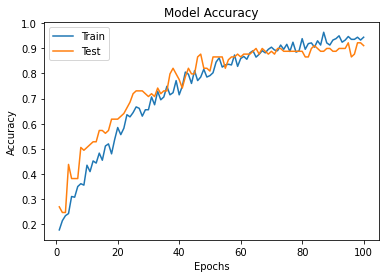

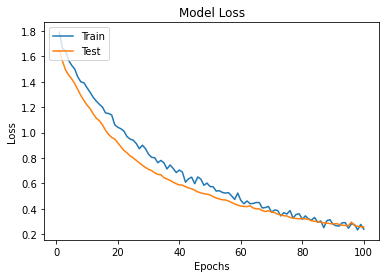

In [63]:
epochs_range = range(1,101)
plt.plot(epochs_range,history.history['accuracy'])
plt.plot(epochs_range,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(epochs_range,history.history['loss'])
plt.plot(epochs_range,history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [65]:
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f69fefdd6d0>)

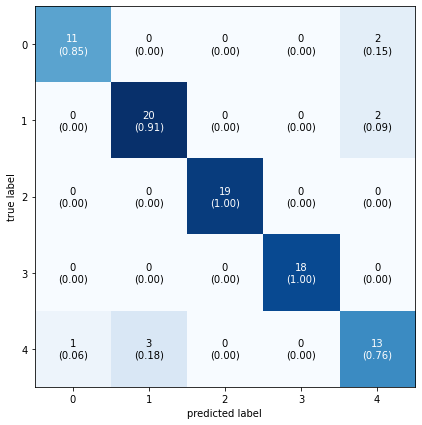

In [67]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(mat, show_normed=True,figsize=(7,7))

In [68]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Walking'],
      dtype=object)